<a href="https://colab.research.google.com/github/npipal/MoneyBall/blob/main/MoneyBall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/baseball.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


#H1 Inspecting/Cleaning/Removing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


# Checking for Duplicate Values

In [4]:
df.duplicated().sum()

0

- No duplicates found no need to remove.

In [5]:
#There are some missing data in 4 columns
df.isna().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

- These columns with missing data are not useful for the target value. So I can remove those. 

# Dropping Unnecessary Columns

In [8]:
df = df.drop(columns = ['RankSeason', 'RankPlayoffs', 'OOBP', 'OSLG'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      1232 non-null   object 
 1   League    1232 non-null   object 
 2   Year      1232 non-null   int64  
 3   RS        1232 non-null   int64  
 4   RA        1232 non-null   int64  
 5   W         1232 non-null   int64  
 6   OBP       1232 non-null   float64
 7   SLG       1232 non-null   float64
 8   BA        1232 non-null   float64
 9   Playoffs  1232 non-null   int64  
 10  G         1232 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 106.0+ KB


- No missing values in this data set

# Checking for Inconsistent Values in Numerical Columns

In [10]:
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,161.918831
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,0.624365
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,158.000000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,162.000000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,162.000000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,162.000000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,165.000000


- I did not see any values that need to be fixed. They all appear to have plausible values.

# Checking for Inconsistent Values in Object Columns

In [11]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Team', 'League'], dtype='object')

In [ ]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- I do not see any inconsistent values in the object columns. 

# Exploring Univariate Visuals for Target (Playoffs) and all Feature Columns

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      1232 non-null   object 
 1   League    1232 non-null   object 
 2   Year      1232 non-null   int64  
 3   RS        1232 non-null   int64  
 4   RA        1232 non-null   int64  
 5   W         1232 non-null   int64  
 6   OBP       1232 non-null   float64
 7   SLG       1232 non-null   float64
 8   BA        1232 non-null   float64
 9   Playoffs  1232 non-null   int64  
 10  G         1232 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 106.0+ KB


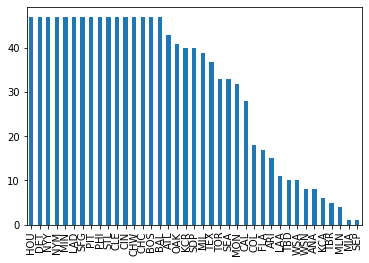

In [18]:
df['Team'].value_counts().plot(kind='bar');

- Not seeing any outliers. A few teams that have less than 10 years but those teams were either relocated or renamed

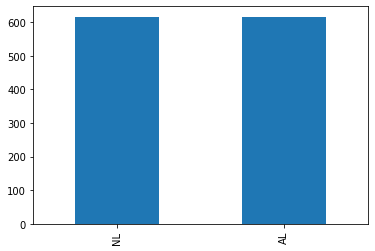

In [21]:
df['League'].value_counts().plot(kind='bar');

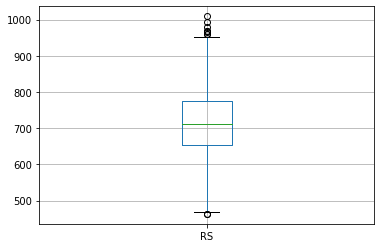

In [22]:
df.boxplot(column='RS')

- A couple of outliers in the data for Runs Scored but everything is plausible

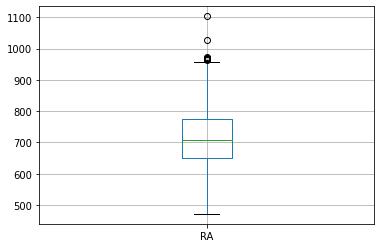

In [23]:
df.boxplot(column='RA')

- A couple of outliers in the data for Runs Allowed but everything is plausible

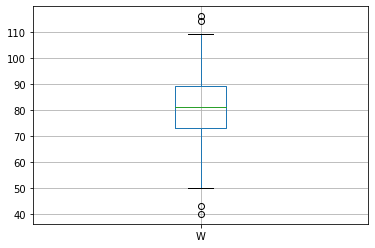

In [24]:
df.boxplot(column='W')

- A couple of outliers in the data for Wins but everything is plausible

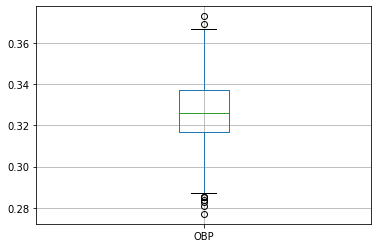

In [25]:
df.boxplot(column='OBP')

- Some outliers in the data for On-Base-Percentage but everything is plausible

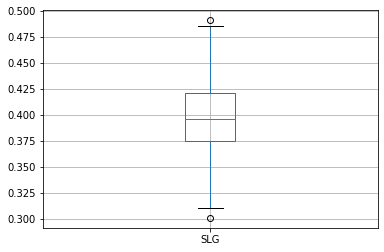

In [27]:
df.boxplot(column='SLG')

- A couple of outliers in the data for Slugging Percentage but everything is plausible

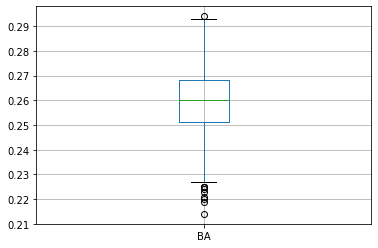

In [28]:
df.boxplot(column='BA')

- Some outliers in the data for Batting Average but everything is plausible

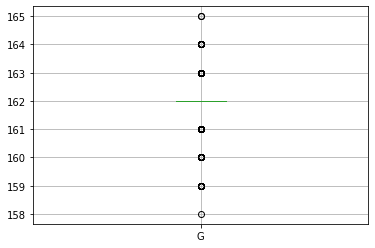

In [30]:
df.boxplot(column='G')

- A couple of outliers in the data for Games but everything is plausible

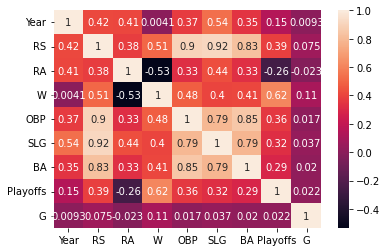

In [31]:
corr = df.corr()

sns.heatmap(corr, annot = True);

- Strong relationship between Playoffs (target) with (features) RS, Wins, OBP, SLG and BA.
- Strong relationship between RS, SLG, OBP, Wins, BA 